Task 1 (2p.): Provide a similar analysis (EDA) for two additional networks as presented in the tutorial
(Facebook dataset and networx library).
The analysis can be limited but with should contain at least the:
- Basic statistics (no of edges, no of nodes, degree distribution)
- One or more visualizations
- Shortest-paths analysis
- Analysis of two or more centrality measures (e.g. PageRank)

In [17]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

## Loading congress twitter data

In [18]:
congress = pd.read_csv(
    'email-Eu-core.txt.gz',
    delimiter=' ',
    names=['source', 'target'],
    usecols=[0, 1]  # specify the columns to read
)
congress


,source,target
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7
...,...,...
25566,420,143
25567,174,859
25568,440,460
25569,52,786


In [19]:
G = nx.from_pandas_edgelist(congress, 'source', 'target')

<!-- Task 1 (2p.): Provide a similar analysis (EDA) for two additional networks as presented in the tutorial
(Facebook dataset and networx library).
The analysis can be limited but with should contain at least the:
- Basic statistics (no of edges, no of nodes, degree distribution)
- One or more visualizations
- Shortest-paths analysis
- Analysis of two or more centrality measures (e.g. PageRank) -->

## Visualizing the network

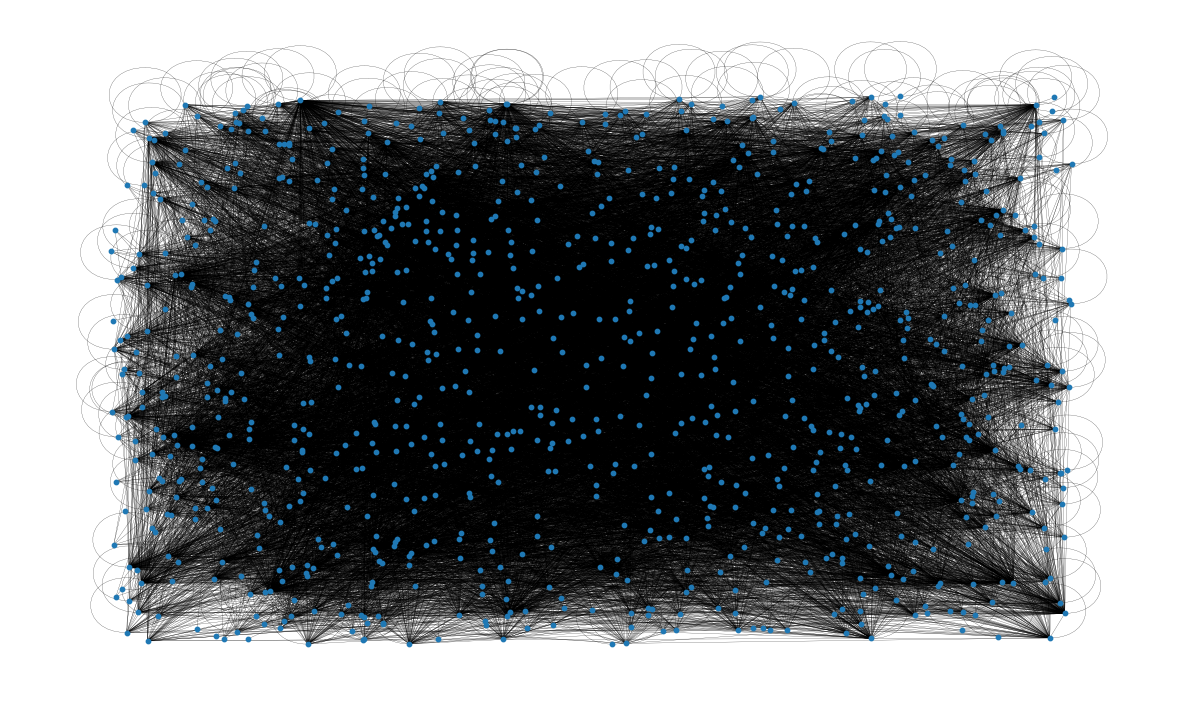

In [20]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

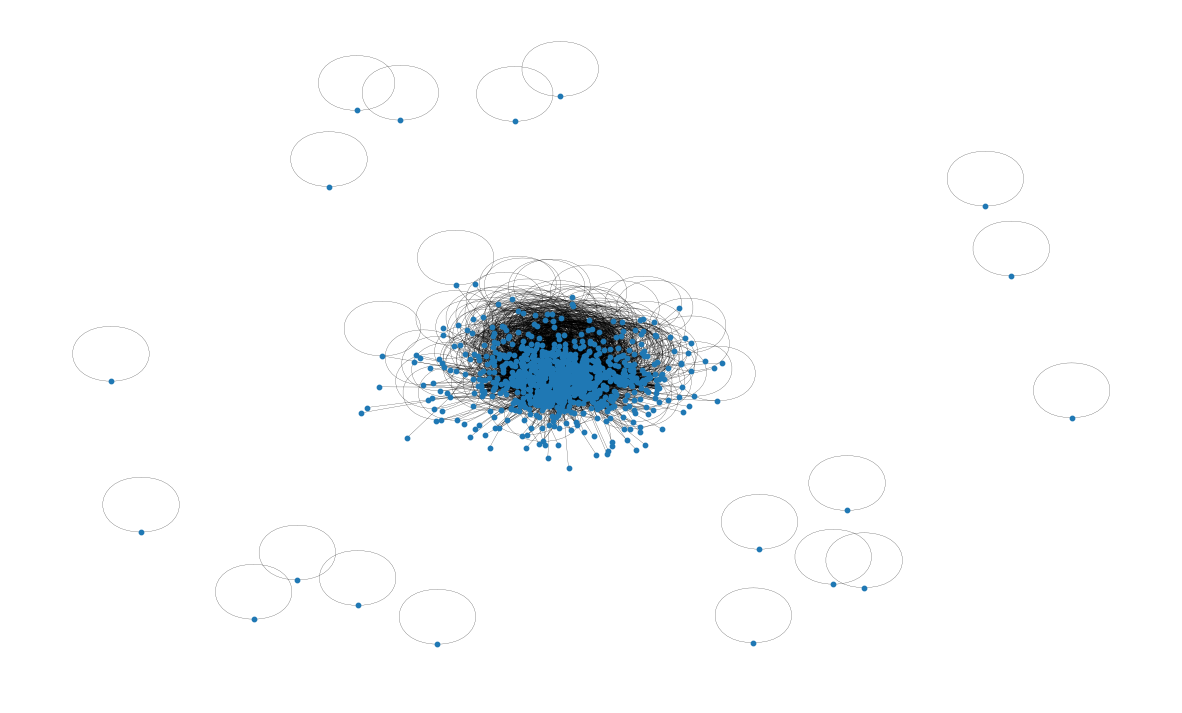

In [21]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

## Basic statistics

In [22]:
G.number_of_nodes()

1005

In [23]:
G.number_of_edges()

16706

In [24]:
degrees = [d for _, d in G.degree()]

### degree distribution

In [25]:
print(f"""
Mean degree: {np.mean(degrees)}
Median degree: {np.median(degrees)}
Max degree: {np.max(degrees)}
Min degree: {np.min(degrees)}
""")


Mean degree: 33.245771144278606
Median degree: 23.0
Max degree: 347
Min degree: 1



## Shortest-paths analysis

In [26]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
shortest_path_lengths[0][37]

3

In [28]:
# diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
# diameter

In [29]:
# Compute the average shortest path length for each node
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]
# The average over all nodes
np.mean(average_path_lengths)

2.5354525546708646

In [30]:
# We know the maximum shortest path length (the diameter), so create an array
# to store values from 0 up to (and including) diameter
path_lengths = np.zeros(diameter + 1, dtype=int)

# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    "Distribution of shortest path length in G", fontdict={"size": 35}, loc="center"
)
ax.set_xlabel("Shortest Path Length", fontdict={"size": 22})
ax.set_ylabel("Frequency (%)", fontdict={"size": 22})

NameError: name 'diameter' is not defined

In [31]:
nx.density(G)

0.03311331787278746

In [32]:
nx.number_connected_components(G)

20

## Analysis of two or more centrality measures

### Degree Centrality

In [33]:
degree_centrality = nx.centrality.degree_centrality(
    G
)  # save results in a variable to use again
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(160, 0.34561752988047806),
 (121, 0.23306772908366533),
 (82, 0.23207171314741035),
 (107, 0.2201195219123506),
 (86, 0.21713147410358566),
 (62, 0.2151394422310757),
 (434, 0.18426294820717132),
 (13, 0.17928286852589642)]

Text(0, 0.5, 'Counts')

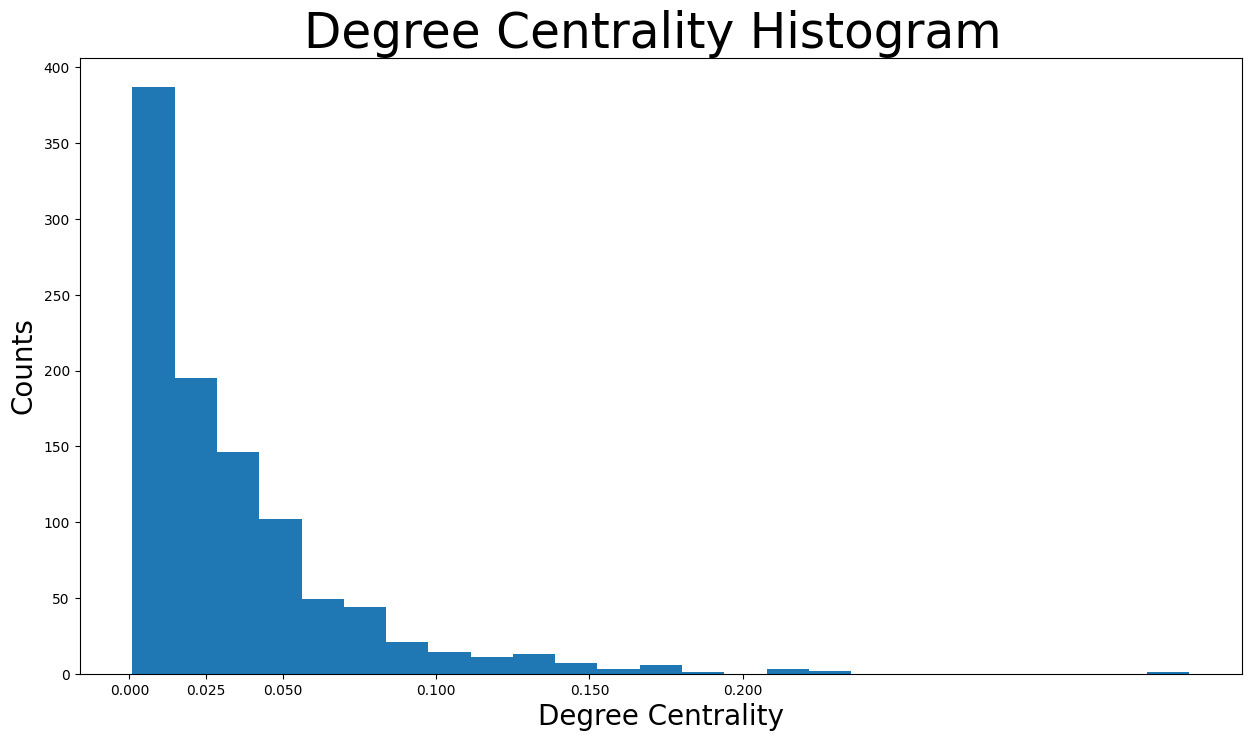

In [34]:
plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-1.047970986366272,
 1.1569542646408082,
 -1.147138915359974,
 1.3053492584824569)

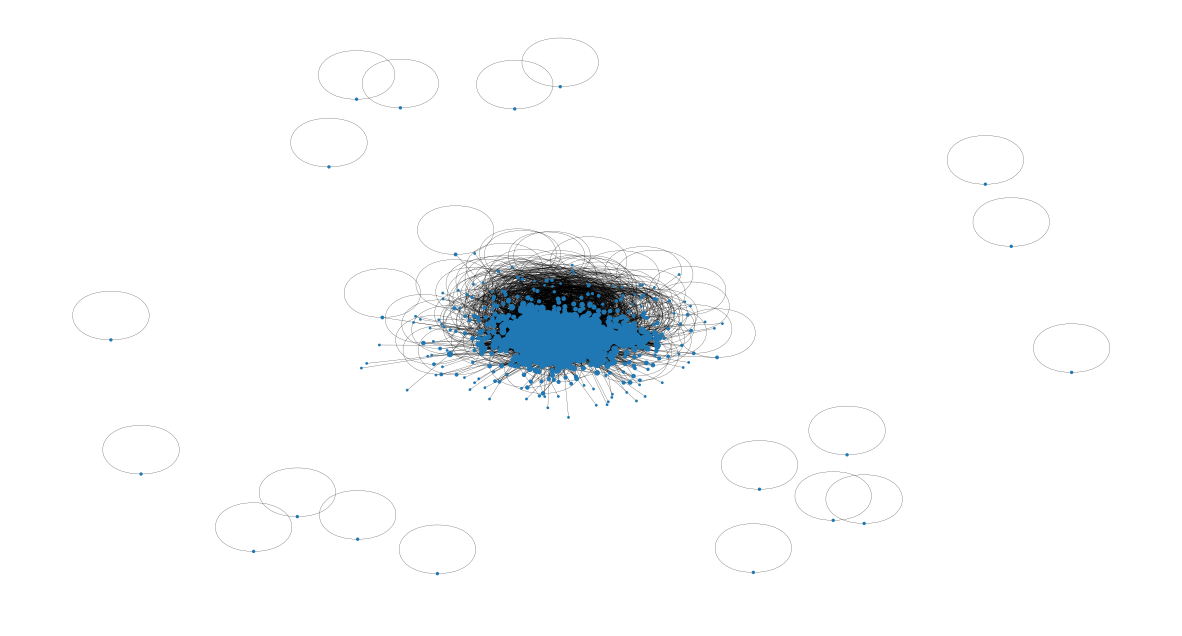

In [35]:
node_size = [
    v * 1000 for v in degree_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

### Betweenness Centrality

In [36]:
betweenness_centrality = nx.centrality.betweenness_centrality(
    G
)  # save results in a variable to use again
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(160, 0.08741473493638795),
 (86, 0.03778853269115196),
 (5, 0.030994686545277747),
 (82, 0.027880741135114222),
 (121, 0.027841538825800698),
 (107, 0.024340312182693967),
 (13, 0.023564989570690153),
 (377, 0.023174608236649356)]

Text(0, 0.5, 'Counts')

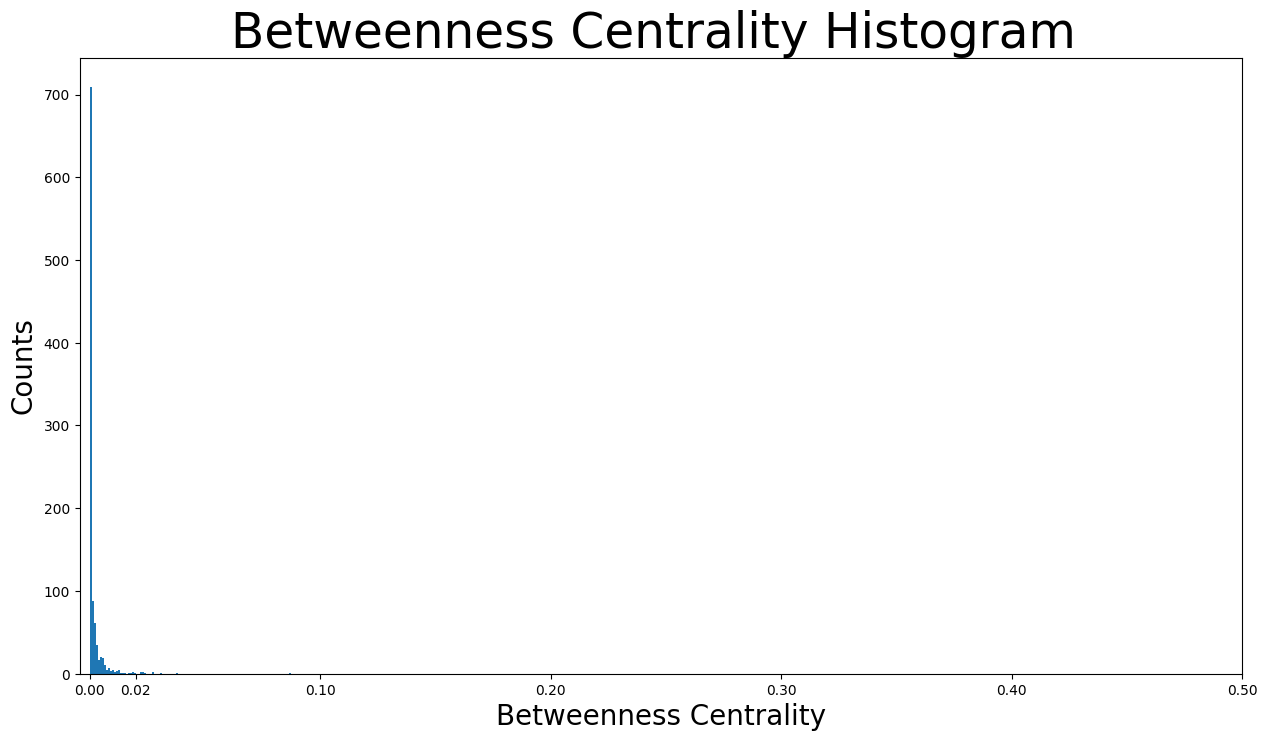

In [37]:
plt.figure(figsize=(15, 8))
plt.hist(betweenness_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5])  # set the x axis ticks
plt.title("Betweenness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-1.047970986366272,
 1.1569542646408082,
 -1.147138915359974,
 1.3053492584824569)

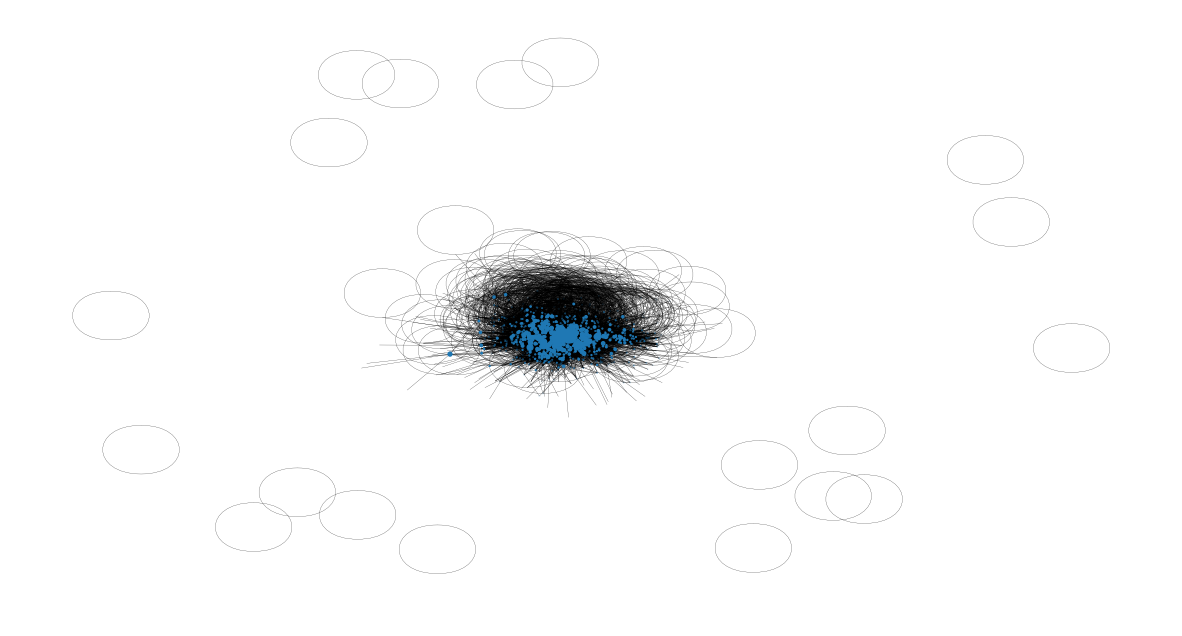

In [38]:
node_size = [
    v * 1200 for v in betweenness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")